# Decision Tree for KickStarProject dataset

Goal: predict state

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
%store -r data

In [3]:
print(data.columns)
print(data.shape)
print(data.info())

Index(['category', 'main_category', 'currency', 'deadline', 'goal', 'launched',
       'pledged', 'state', 'backers', 'country', 'usd pledged',
       'usd_pledged_real', 'usd_goal_real', 'continent', 'days_launched',
       'launched_month'],
      dtype='object')
(5000, 16)
<class 'pandas.core.frame.DataFrame'>
Index: 5000 entries, 372978 to 378660
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   category          5000 non-null   object        
 1   main_category     5000 non-null   object        
 2   currency          5000 non-null   object        
 3   deadline          5000 non-null   datetime64[ns]
 4   goal              5000 non-null   float64       
 5   launched          5000 non-null   datetime64[ns]
 6   pledged           5000 non-null   float64       
 7   state             5000 non-null   int64         
 8   backers           5000 non-null   int64         
 9   country        

In [4]:
data_rn = data.copy()
data_rn.drop(['category','main_category','currency','deadline','goal','launched','country','continent','usd_goal_real','days_launched','launched_month'] ,axis=1,inplace=True)
data_rn.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5000 entries, 372978 to 378660
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   pledged           5000 non-null   float64
 1   state             5000 non-null   int64  
 2   backers           5000 non-null   int64  
 3   usd pledged       5000 non-null   float64
 4   usd_pledged_real  5000 non-null   float64
dtypes: float64(3), int64(2)
memory usage: 234.4 KB


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

def grafico_barras(data,atr,title,xlabel,ylabel):
    incidents_count = data[atr].value_counts()
    sns.set(style='darkgrid')
    sns.barplot(x=incidents_count.index, y=incidents_count.values)
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.show()


X = data_rn.drop(['state'],axis=1)
y = data_rn['state'].to_frame()
random = 2021
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=random)

In [6]:
print("The shape of X %s. X_train has shape %s while X_test has shape %s" %(X.shape, X_train.shape, X_test.shape))
print("The shape of y %s. y_train has shape %s while y_test has shape %s" %(y.shape, y_train.shape, y_test.shape))

The shape of X (5000, 4). X_train has shape (3500, 4) while X_test has shape (1500, 4)
The shape of y (5000, 1). y_train has shape (3500, 1) while y_test has shape (1500, 1)


C:\Users\jmbar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\jmbar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\jmbar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


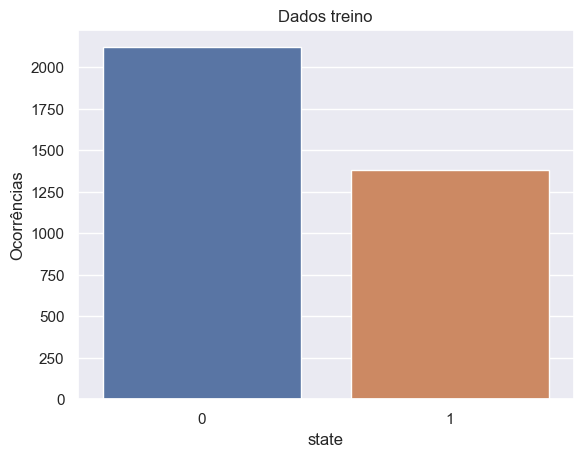

C:\Users\jmbar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\jmbar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\jmbar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


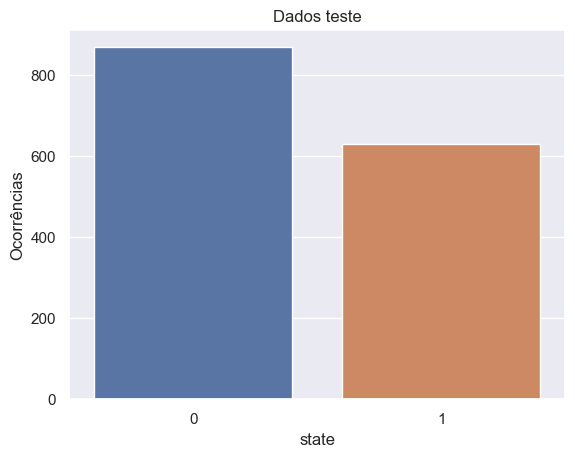

In [7]:
grafico_barras(y_train,'state','Dados treino','state','Ocorrências')
grafico_barras(y_test,'state','Dados teste','state','Ocorrências')

In [8]:
from sklearn.model_selection import GridSearchCV, KFold, train_test_split

In [9]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from scikeras.wrappers import KerasClassifier

In [10]:
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.12.1


In [11]:
def build_model(activation='sigmoid', learning_rate=0.01):
    model = Sequential()
    model.add(Dense(16, input_dim=4, activation=activation))
    model.add(Dense(12, activation=activation))
    model.add(Dense(8, activation=activation))
    model.add(Dense(1, activation='sigmoid'))  # Output layer

    # Compile the model
    model.compile(
        loss='binary_crossentropy',
        optimizer=tf.optimizers.Adam(learning_rate),
        metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()]
    )
    return model

In [12]:
from sklearn.preprocessing import MinMaxScaler

scaler_x = MinMaxScaler(feature_range=(0,1)).fit(X)
X_scaled = pd.DataFrame(scaler_x.transform(X[X.columns]), columns = X.columns)

In [13]:
X.head()

,pledged,backers,usd pledged,usd_pledged_real
372978,125.0,2,125.0,125.0
372979,120.0,3,120.0,120.0
372980,0.0,0,0.0,0.0
372981,1502.0,12,1502.0,1502.0
372983,25.0,1,25.0,25.0


In [14]:
X_scaled.head()

,pledged,backers,usd pledged,usd_pledged_real
0,0.000040,0.000082,0.000040,0.000040
1,0.000038,0.000123,0.000038,0.000038
2,0.000000,0.000000,0.000000,0.000000
3,0.000480,0.000493,0.000480,0.000480
4,0.000008,0.000041,0.000008,0.000008


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,test_size=0.2,random_state=2022)

In [16]:
optimizer = ['SGD', 'RMSprop', 'Adagrad']
param_grid = dict(optimizer = optimizer)

In [17]:
kf = KFold(n_splits = 5, shuffle = True, random_state = 2021)

In [18]:
build_model = build_model()
model = KerasClassifier(model = build_model, batch_size = 40, validation_split = 0.2, epochs = 60)

In [19]:
grid_search = GridSearchCV(estimator = model, param_grid = param_grid, cv = kf, scoring = 'accuracy',refit = 'True', verbose = 1,error_score='raise',)
grid_search.fit(X_train,y_train)

INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmphkzfh5tf\assets


INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmphkzfh5tf\assets


Fitting 5 folds for each of 3 candidates, totalling 15 fits


INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmpydme59ds\assets


INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmpydme59ds\assets


Epoch 1/60
64/64 [==============================] - 1s 7ms/step - loss: 0.6764 - accuracy: 0.5984 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.6793 - val_accuracy: 0.5844 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/60
64/64 [==============================] - 0s 2ms/step - loss: 0.6763 - accuracy: 0.5984 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.6800 - val_accuracy: 0.5844 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/60
64/64 [==============================] - 0s 2ms/step - loss: 0.6752 - accuracy: 0.5984 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.6815 - val_accuracy: 0.5844 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/60
64/64 [==============================] - 0s 3ms/step - loss: 0.6763 - accuracy: 0.5984 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.6784 - val_accuracy: 0.5844 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/60
64/64 [==============================

64/64 [==============================] - 0s 3ms/step - loss: 0.3814 - accuracy: 0.8316 - precision: 0.8055 - recall: 0.7656 - val_loss: 0.4029 - val_accuracy: 0.8313 - val_precision: 0.8015 - val_recall: 0.7895
Epoch 38/60
64/64 [==============================] - 0s 3ms/step - loss: 0.3756 - accuracy: 0.8363 - precision: 0.8129 - recall: 0.7695 - val_loss: 0.4851 - val_accuracy: 0.7922 - val_precision: 0.8213 - val_recall: 0.6391
Epoch 39/60
64/64 [==============================] - 0s 3ms/step - loss: 0.3827 - accuracy: 0.8367 - precision: 0.8093 - recall: 0.7763 - val_loss: 0.4104 - val_accuracy: 0.8234 - val_precision: 0.8201 - val_recall: 0.7368
Epoch 40/60
64/64 [==============================] - 0s 3ms/step - loss: 0.3813 - accuracy: 0.8383 - precision: 0.8082 - recall: 0.7831 - val_loss: 0.4054 - val_accuracy: 0.8250 - val_precision: 0.8105 - val_recall: 0.7556
Epoch 41/60
64/64 [==============================] - 0s 3ms/step - loss: 0.3824 - accuracy: 0.8359 - precision: 0.8034 -

INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmp2be7l3if\assets


INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmp2be7l3if\assets


Epoch 1/60
64/64 [==============================] - 1s 7ms/step - loss: 0.6775 - accuracy: 0.5926 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.6833 - val_accuracy: 0.5859 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/60
64/64 [==============================] - 0s 2ms/step - loss: 0.6778 - accuracy: 0.5926 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.6783 - val_accuracy: 0.5859 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/60
64/64 [==============================] - 0s 3ms/step - loss: 0.6764 - accuracy: 0.5926 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.6781 - val_accuracy: 0.5859 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/60
64/64 [==============================] - 0s 2ms/step - loss: 0.6772 - accuracy: 0.5926 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.6777 - val_accuracy: 0.5859 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/60
64/64 [==============================

64/64 [==============================] - 0s 2ms/step - loss: 0.3855 - accuracy: 0.8367 - precision: 0.8085 - recall: 0.7852 - val_loss: 0.4029 - val_accuracy: 0.8156 - val_precision: 0.7838 - val_recall: 0.7660
Epoch 38/60
64/64 [==============================] - 0s 2ms/step - loss: 0.3771 - accuracy: 0.8340 - precision: 0.8065 - recall: 0.7795 - val_loss: 0.4218 - val_accuracy: 0.8094 - val_precision: 0.8095 - val_recall: 0.7057
Epoch 39/60
64/64 [==============================] - 0s 3ms/step - loss: 0.3871 - accuracy: 0.8305 - precision: 0.8000 - recall: 0.7785 - val_loss: 0.4045 - val_accuracy: 0.8188 - val_precision: 0.7790 - val_recall: 0.7849
Epoch 40/60
64/64 [==============================] - 0s 2ms/step - loss: 0.3825 - accuracy: 0.8371 - precision: 0.8105 - recall: 0.7833 - val_loss: 0.4023 - val_accuracy: 0.8156 - val_precision: 0.7928 - val_recall: 0.7509
Epoch 41/60
64/64 [==============================] - 0s 2ms/step - loss: 0.3843 - accuracy: 0.8344 - precision: 0.8031 -

INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmph8ewre0j\assets


INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmph8ewre0j\assets


Epoch 1/60
64/64 [==============================] - 1s 7ms/step - loss: 0.6760 - accuracy: 0.5980 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.6810 - val_accuracy: 0.5813 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/60
64/64 [==============================] - 0s 2ms/step - loss: 0.6766 - accuracy: 0.5980 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.6804 - val_accuracy: 0.5813 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/60
64/64 [==============================] - 0s 3ms/step - loss: 0.6744 - accuracy: 0.5980 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.6795 - val_accuracy: 0.5813 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/60
64/64 [==============================] - 0s 3ms/step - loss: 0.6741 - accuracy: 0.5980 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.6821 - val_accuracy: 0.5813 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/60
64/64 [==============================

64/64 [==============================] - 0s 3ms/step - loss: 0.3865 - accuracy: 0.8375 - precision: 0.8144 - recall: 0.7716 - val_loss: 0.4105 - val_accuracy: 0.8141 - val_precision: 0.8091 - val_recall: 0.7276
Epoch 38/60
64/64 [==============================] - 0s 2ms/step - loss: 0.3812 - accuracy: 0.8309 - precision: 0.8028 - recall: 0.7677 - val_loss: 0.4676 - val_accuracy: 0.7812 - val_precision: 0.8107 - val_recall: 0.6231
Epoch 39/60
64/64 [==============================] - 0s 3ms/step - loss: 0.3790 - accuracy: 0.8363 - precision: 0.8100 - recall: 0.7745 - val_loss: 0.4059 - val_accuracy: 0.8156 - val_precision: 0.7953 - val_recall: 0.7537
Epoch 40/60
64/64 [==============================] - 0s 3ms/step - loss: 0.3823 - accuracy: 0.8336 - precision: 0.8105 - recall: 0.7648 - val_loss: 0.4097 - val_accuracy: 0.8234 - val_precision: 0.7818 - val_recall: 0.8022
Epoch 41/60
64/64 [==============================] - 0s 3ms/step - loss: 0.3785 - accuracy: 0.8379 - precision: 0.8070 -

INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmpy1j1tq85\assets


INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmpy1j1tq85\assets


Epoch 1/60
64/64 [==============================] - 1s 6ms/step - loss: 0.6729 - accuracy: 0.6047 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.6879 - val_accuracy: 0.5594 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/60
64/64 [==============================] - 0s 2ms/step - loss: 0.6737 - accuracy: 0.6047 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.6893 - val_accuracy: 0.5594 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/60
64/64 [==============================] - 0s 2ms/step - loss: 0.6742 - accuracy: 0.6047 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.6889 - val_accuracy: 0.5594 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/60
64/64 [==============================] - 0s 2ms/step - loss: 0.6715 - accuracy: 0.6047 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.6923 - val_accuracy: 0.5594 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/60
64/64 [==============================

64/64 [==============================] - 0s 2ms/step - loss: 0.3828 - accuracy: 0.8359 - precision: 0.8027 - recall: 0.7757 - val_loss: 0.4105 - val_accuracy: 0.8188 - val_precision: 0.7902 - val_recall: 0.8014
Epoch 38/60
64/64 [==============================] - 0s 2ms/step - loss: 0.3913 - accuracy: 0.8328 - precision: 0.7967 - recall: 0.7747 - val_loss: 0.4562 - val_accuracy: 0.7906 - val_precision: 0.8162 - val_recall: 0.6773
Epoch 39/60
64/64 [==============================] - 0s 2ms/step - loss: 0.4079 - accuracy: 0.8313 - precision: 0.7918 - recall: 0.7777 - val_loss: 0.4086 - val_accuracy: 0.8156 - val_precision: 0.7929 - val_recall: 0.7872
Epoch 40/60
64/64 [==============================] - 0s 2ms/step - loss: 0.3990 - accuracy: 0.8320 - precision: 0.7945 - recall: 0.7757 - val_loss: 0.4115 - val_accuracy: 0.8141 - val_precision: 0.8052 - val_recall: 0.7624
Epoch 41/60
64/64 [==============================] - 0s 2ms/step - loss: 0.3803 - accuracy: 0.8383 - precision: 0.7996 -

INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmp_2h_h4gv\assets


INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmp_2h_h4gv\assets


Epoch 1/60
64/64 [==============================] - 1s 6ms/step - loss: 0.6798 - accuracy: 0.5953 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.6723 - val_accuracy: 0.6078 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/60
64/64 [==============================] - 0s 3ms/step - loss: 0.6770 - accuracy: 0.5953 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.6707 - val_accuracy: 0.6078 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/60
64/64 [==============================] - 0s 2ms/step - loss: 0.6753 - accuracy: 0.5953 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.6695 - val_accuracy: 0.6078 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/60
64/64 [==============================] - 0s 2ms/step - loss: 0.6748 - accuracy: 0.5953 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.6695 - val_accuracy: 0.6078 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/60
64/64 [==============================

64/64 [==============================] - 0s 2ms/step - loss: 0.3759 - accuracy: 0.8352 - precision: 0.8126 - recall: 0.7703 - val_loss: 0.4125 - val_accuracy: 0.8172 - val_precision: 0.7702 - val_recall: 0.7610
Epoch 38/60
64/64 [==============================] - 0s 2ms/step - loss: 0.3848 - accuracy: 0.8355 - precision: 0.8122 - recall: 0.7722 - val_loss: 0.4391 - val_accuracy: 0.8125 - val_precision: 0.7348 - val_recall: 0.8167
Epoch 39/60
64/64 [==============================] - 0s 2ms/step - loss: 0.3846 - accuracy: 0.8355 - precision: 0.8103 - recall: 0.7751 - val_loss: 0.4138 - val_accuracy: 0.8109 - val_precision: 0.7539 - val_recall: 0.7689
Epoch 40/60
64/64 [==============================] - 0s 2ms/step - loss: 0.3728 - accuracy: 0.8402 - precision: 0.8132 - recall: 0.7857 - val_loss: 0.4108 - val_accuracy: 0.8203 - val_precision: 0.7810 - val_recall: 0.7530
Epoch 41/60
64/64 [==============================] - 0s 2ms/step - loss: 0.3763 - accuracy: 0.8367 - precision: 0.8096 -

INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmpngx4phm7\assets


INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmpngx4phm7\assets


Epoch 1/60
64/64 [==============================] - 1s 6ms/step - loss: 0.6787 - accuracy: 0.5984 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.6790 - val_accuracy: 0.5844 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/60
64/64 [==============================] - 0s 2ms/step - loss: 0.6746 - accuracy: 0.5984 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.6787 - val_accuracy: 0.5844 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/60
64/64 [==============================] - 0s 2ms/step - loss: 0.6764 - accuracy: 0.5984 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.6786 - val_accuracy: 0.5844 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/60
64/64 [==============================] - 0s 2ms/step - loss: 0.6740 - accuracy: 0.5984 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.6788 - val_accuracy: 0.5844 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/60
64/64 [==============================

64/64 [==============================] - 0s 2ms/step - loss: 0.3823 - accuracy: 0.8375 - precision: 0.8103 - recall: 0.7772 - val_loss: 0.4084 - val_accuracy: 0.8266 - val_precision: 0.7818 - val_recall: 0.8083
Epoch 38/60
64/64 [==============================] - 0s 2ms/step - loss: 0.3923 - accuracy: 0.8309 - precision: 0.8045 - recall: 0.7646 - val_loss: 0.4081 - val_accuracy: 0.8234 - val_precision: 0.8174 - val_recall: 0.7406
Epoch 39/60
64/64 [==============================] - 0s 2ms/step - loss: 0.3807 - accuracy: 0.8383 - precision: 0.8107 - recall: 0.7792 - val_loss: 0.4508 - val_accuracy: 0.8313 - val_precision: 0.7582 - val_recall: 0.8722
Epoch 40/60
64/64 [==============================] - 0s 2ms/step - loss: 0.4174 - accuracy: 0.8305 - precision: 0.7988 - recall: 0.7724 - val_loss: 0.4252 - val_accuracy: 0.8109 - val_precision: 0.8194 - val_recall: 0.6992
Epoch 41/60
64/64 [==============================] - 0s 2ms/step - loss: 0.3761 - accuracy: 0.8383 - precision: 0.8126 -

INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmp66m41h2y\assets


INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmp66m41h2y\assets


Epoch 1/60
64/64 [==============================] - 1s 6ms/step - loss: 0.6795 - accuracy: 0.5926 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.6783 - val_accuracy: 0.5859 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/60
64/64 [==============================] - 0s 2ms/step - loss: 0.6766 - accuracy: 0.5926 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.6781 - val_accuracy: 0.5859 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/60
64/64 [==============================] - 0s 2ms/step - loss: 0.6768 - accuracy: 0.5926 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.6790 - val_accuracy: 0.5859 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/60
64/64 [==============================] - 0s 2ms/step - loss: 0.6780 - accuracy: 0.5926 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.6813 - val_accuracy: 0.5859 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/60
64/64 [==============================

64/64 [==============================] - 0s 2ms/step - loss: 0.4094 - accuracy: 0.8316 - precision: 0.7971 - recall: 0.7872 - val_loss: 0.4247 - val_accuracy: 0.8062 - val_precision: 0.8079 - val_recall: 0.6981
Epoch 38/60
64/64 [==============================] - 0s 2ms/step - loss: 0.3840 - accuracy: 0.8324 - precision: 0.8004 - recall: 0.7843 - val_loss: 0.4031 - val_accuracy: 0.8172 - val_precision: 0.7803 - val_recall: 0.7774
Epoch 39/60
64/64 [==============================] - 0s 2ms/step - loss: 0.3834 - accuracy: 0.8348 - precision: 0.8094 - recall: 0.7776 - val_loss: 0.4012 - val_accuracy: 0.8172 - val_precision: 0.7937 - val_recall: 0.7547
Epoch 40/60
64/64 [==============================] - 0s 2ms/step - loss: 0.3873 - accuracy: 0.8355 - precision: 0.8019 - recall: 0.7919 - val_loss: 0.4007 - val_accuracy: 0.8172 - val_precision: 0.7803 - val_recall: 0.7774
Epoch 41/60
64/64 [==============================] - 0s 2ms/step - loss: 0.3762 - accuracy: 0.8371 - precision: 0.8057 -

INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmp_wey2o0v\assets


INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmp_wey2o0v\assets


Epoch 1/60
64/64 [==============================] - 1s 6ms/step - loss: 0.6770 - accuracy: 0.5980 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.6825 - val_accuracy: 0.5813 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/60
64/64 [==============================] - 0s 2ms/step - loss: 0.6753 - accuracy: 0.5980 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.6825 - val_accuracy: 0.5813 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/60
64/64 [==============================] - 0s 2ms/step - loss: 0.6746 - accuracy: 0.5980 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.6809 - val_accuracy: 0.5813 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/60
64/64 [==============================] - 0s 2ms/step - loss: 0.6743 - accuracy: 0.5980 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.6790 - val_accuracy: 0.5813 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/60
64/64 [==============================

64/64 [==============================] - 0s 2ms/step - loss: 0.3886 - accuracy: 0.8324 - precision: 0.8043 - recall: 0.7707 - val_loss: 0.4481 - val_accuracy: 0.7844 - val_precision: 0.8095 - val_recall: 0.6343
Epoch 38/60
64/64 [==============================] - 0s 2ms/step - loss: 0.3786 - accuracy: 0.8352 - precision: 0.8126 - recall: 0.7668 - val_loss: 0.4094 - val_accuracy: 0.8203 - val_precision: 0.7865 - val_recall: 0.7836
Epoch 39/60
64/64 [==============================] - 0s 2ms/step - loss: 0.3812 - accuracy: 0.8340 - precision: 0.8101 - recall: 0.7668 - val_loss: 0.4074 - val_accuracy: 0.8188 - val_precision: 0.7857 - val_recall: 0.7799
Epoch 40/60
64/64 [==============================] - 0s 2ms/step - loss: 0.3886 - accuracy: 0.8352 - precision: 0.8069 - recall: 0.7755 - val_loss: 0.4098 - val_accuracy: 0.8219 - val_precision: 0.7852 - val_recall: 0.7910
Epoch 41/60
64/64 [==============================] - 0s 2ms/step - loss: 0.3880 - accuracy: 0.8359 - precision: 0.8085 -

INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmpiyh3wvyo\assets


INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmpiyh3wvyo\assets


Epoch 1/60
64/64 [==============================] - 1s 6ms/step - loss: 0.6751 - accuracy: 0.6047 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.6903 - val_accuracy: 0.5594 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/60
64/64 [==============================] - 0s 3ms/step - loss: 0.6718 - accuracy: 0.6047 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.6900 - val_accuracy: 0.5594 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/60
64/64 [==============================] - 0s 3ms/step - loss: 0.6709 - accuracy: 0.6047 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.6860 - val_accuracy: 0.5594 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/60
64/64 [==============================] - 0s 3ms/step - loss: 0.6719 - accuracy: 0.6047 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.6909 - val_accuracy: 0.5594 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/60
64/64 [==============================

64/64 [==============================] - 0s 2ms/step - loss: 0.3897 - accuracy: 0.8297 - precision: 0.7957 - recall: 0.7658 - val_loss: 0.4233 - val_accuracy: 0.8203 - val_precision: 0.7793 - val_recall: 0.8262
Epoch 38/60
64/64 [==============================] - 0s 2ms/step - loss: 0.3885 - accuracy: 0.8316 - precision: 0.7949 - recall: 0.7737 - val_loss: 0.4652 - val_accuracy: 0.7812 - val_precision: 0.8114 - val_recall: 0.6560
Epoch 39/60
64/64 [==============================] - 0s 2ms/step - loss: 0.4095 - accuracy: 0.8285 - precision: 0.7897 - recall: 0.7717 - val_loss: 0.4487 - val_accuracy: 0.8297 - val_precision: 0.7746 - val_recall: 0.8652
Epoch 40/60
64/64 [==============================] - 0s 2ms/step - loss: 0.3902 - accuracy: 0.8336 - precision: 0.7972 - recall: 0.7767 - val_loss: 0.4535 - val_accuracy: 0.7859 - val_precision: 0.8139 - val_recall: 0.6667
Epoch 41/60
64/64 [==============================] - 0s 3ms/step - loss: 0.3868 - accuracy: 0.8324 - precision: 0.7984 -

INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmpft4k08xn\assets


INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmpft4k08xn\assets


Epoch 1/60
64/64 [==============================] - 1s 6ms/step - loss: 0.6776 - accuracy: 0.5953 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.6696 - val_accuracy: 0.6078 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/60
64/64 [==============================] - 0s 2ms/step - loss: 0.6771 - accuracy: 0.5953 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.6716 - val_accuracy: 0.6078 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/60
64/64 [==============================] - 0s 2ms/step - loss: 0.6753 - accuracy: 0.5953 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.6717 - val_accuracy: 0.6078 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/60
64/64 [==============================] - 0s 2ms/step - loss: 0.6747 - accuracy: 0.5953 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.6703 - val_accuracy: 0.6078 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/60
64/64 [==============================

64/64 [==============================] - 0s 3ms/step - loss: 0.3771 - accuracy: 0.8344 - precision: 0.8091 - recall: 0.7732 - val_loss: 0.4306 - val_accuracy: 0.8094 - val_precision: 0.7329 - val_recall: 0.8088
Epoch 38/60
64/64 [==============================] - 0s 3ms/step - loss: 0.3818 - accuracy: 0.8355 - precision: 0.8109 - recall: 0.7741 - val_loss: 0.4222 - val_accuracy: 0.8109 - val_precision: 0.7902 - val_recall: 0.7052
Epoch 39/60
64/64 [==============================] - 0s 3ms/step - loss: 0.3898 - accuracy: 0.8352 - precision: 0.8052 - recall: 0.7819 - val_loss: 0.4112 - val_accuracy: 0.8219 - val_precision: 0.7842 - val_recall: 0.7530
Epoch 40/60
64/64 [==============================] - 0s 2ms/step - loss: 0.3827 - accuracy: 0.8316 - precision: 0.8028 - recall: 0.7741 - val_loss: 0.4343 - val_accuracy: 0.8078 - val_precision: 0.7991 - val_recall: 0.6813
Epoch 41/60
64/64 [==============================] - 0s 2ms/step - loss: 0.3769 - accuracy: 0.8375 - precision: 0.8088 -

INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmpy9e2txq4\assets


INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmpy9e2txq4\assets


Epoch 1/60
64/64 [==============================] - 1s 6ms/step - loss: 0.6758 - accuracy: 0.5875 - precision: 0.3250 - recall: 0.0253 - val_loss: 0.6794 - val_accuracy: 0.5844 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/60
64/64 [==============================] - 0s 2ms/step - loss: 0.6744 - accuracy: 0.5984 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.6789 - val_accuracy: 0.5844 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/60
64/64 [==============================] - 0s 2ms/step - loss: 0.6743 - accuracy: 0.5984 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.6790 - val_accuracy: 0.5844 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/60
64/64 [==============================] - 0s 2ms/step - loss: 0.6740 - accuracy: 0.5984 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.6828 - val_accuracy: 0.5844 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/60
64/64 [==============================] - 0s 2

64/64 [==============================] - 0s 2ms/step - loss: 0.3821 - accuracy: 0.8328 - precision: 0.8086 - recall: 0.7646 - val_loss: 0.4115 - val_accuracy: 0.8203 - val_precision: 0.8186 - val_recall: 0.7293
Epoch 38/60
64/64 [==============================] - 0s 2ms/step - loss: 0.3830 - accuracy: 0.8324 - precision: 0.8072 - recall: 0.7656 - val_loss: 0.4054 - val_accuracy: 0.8281 - val_precision: 0.8120 - val_recall: 0.7632
Epoch 39/60
64/64 [==============================] - 0s 2ms/step - loss: 0.3788 - accuracy: 0.8344 - precision: 0.8063 - recall: 0.7733 - val_loss: 0.4014 - val_accuracy: 0.8281 - val_precision: 0.7932 - val_recall: 0.7932
Epoch 40/60
64/64 [==============================] - 0s 2ms/step - loss: 0.3889 - accuracy: 0.8316 - precision: 0.8068 - recall: 0.7636 - val_loss: 0.4005 - val_accuracy: 0.8281 - val_precision: 0.7932 - val_recall: 0.7932
Epoch 41/60
64/64 [==============================] - 0s 2ms/step - loss: 0.4014 - accuracy: 0.8324 - precision: 0.8022 -

INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmpw2yzpy8v\assets


INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmpw2yzpy8v\assets


Epoch 1/60
64/64 [==============================] - 1s 6ms/step - loss: 0.6813 - accuracy: 0.5926 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.6797 - val_accuracy: 0.5859 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/60
64/64 [==============================] - 0s 2ms/step - loss: 0.6766 - accuracy: 0.5926 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.6787 - val_accuracy: 0.5859 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/60
64/64 [==============================] - 0s 2ms/step - loss: 0.6769 - accuracy: 0.5926 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.6778 - val_accuracy: 0.5859 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/60
64/64 [==============================] - 0s 2ms/step - loss: 0.6766 - accuracy: 0.5926 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.6825 - val_accuracy: 0.5859 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/60
64/64 [==============================

64/64 [==============================] - 0s 3ms/step - loss: 0.3840 - accuracy: 0.8324 - precision: 0.8052 - recall: 0.7766 - val_loss: 0.4063 - val_accuracy: 0.8172 - val_precision: 0.8033 - val_recall: 0.7396
Epoch 38/60
64/64 [==============================] - 0s 2ms/step - loss: 0.3830 - accuracy: 0.8328 - precision: 0.8066 - recall: 0.7756 - val_loss: 0.4054 - val_accuracy: 0.8156 - val_precision: 0.7795 - val_recall: 0.7736
Epoch 39/60
64/64 [==============================] - 0s 2ms/step - loss: 0.3813 - accuracy: 0.8336 - precision: 0.8057 - recall: 0.7795 - val_loss: 0.4128 - val_accuracy: 0.8156 - val_precision: 0.8101 - val_recall: 0.7245
Epoch 40/60
64/64 [==============================] - 0s 2ms/step - loss: 0.3886 - accuracy: 0.8320 - precision: 0.8038 - recall: 0.7776 - val_loss: 0.4166 - val_accuracy: 0.8172 - val_precision: 0.7643 - val_recall: 0.8075
Epoch 41/60
64/64 [==============================] - 0s 2ms/step - loss: 0.3790 - accuracy: 0.8367 - precision: 0.8061 -

INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmp4su8krnq\assets


INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmp4su8krnq\assets


Epoch 1/60
64/64 [==============================] - 1s 6ms/step - loss: 0.6778 - accuracy: 0.5980 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.6798 - val_accuracy: 0.5813 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/60
64/64 [==============================] - 0s 2ms/step - loss: 0.6751 - accuracy: 0.5980 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.6889 - val_accuracy: 0.5813 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/60
64/64 [==============================] - 0s 2ms/step - loss: 0.6758 - accuracy: 0.5980 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.6853 - val_accuracy: 0.5813 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/60
64/64 [==============================] - 0s 2ms/step - loss: 0.6743 - accuracy: 0.5980 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.6826 - val_accuracy: 0.5813 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/60
64/64 [==============================

64/64 [==============================] - 0s 2ms/step - loss: 0.3837 - accuracy: 0.8348 - precision: 0.8086 - recall: 0.7716 - val_loss: 0.4230 - val_accuracy: 0.8203 - val_precision: 0.7722 - val_recall: 0.8097
Epoch 38/60
64/64 [==============================] - 0s 2ms/step - loss: 0.3829 - accuracy: 0.8355 - precision: 0.8108 - recall: 0.7707 - val_loss: 0.4219 - val_accuracy: 0.8062 - val_precision: 0.8130 - val_recall: 0.6978
Epoch 39/60
64/64 [==============================] - 0s 2ms/step - loss: 0.3827 - accuracy: 0.8359 - precision: 0.8073 - recall: 0.7775 - val_loss: 0.4086 - val_accuracy: 0.8203 - val_precision: 0.7865 - val_recall: 0.7836
Epoch 40/60
64/64 [==============================] - 0s 2ms/step - loss: 0.3858 - accuracy: 0.8355 - precision: 0.8071 - recall: 0.7765 - val_loss: 0.4415 - val_accuracy: 0.7953 - val_precision: 0.8157 - val_recall: 0.6604
Epoch 41/60
64/64 [==============================] - 0s 2ms/step - loss: 0.3966 - accuracy: 0.8266 - precision: 0.7976 -

INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmp636_8g4l\assets


INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmp636_8g4l\assets


Epoch 1/60
64/64 [==============================] - 1s 6ms/step - loss: 0.6747 - accuracy: 0.6047 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.6908 - val_accuracy: 0.5594 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/60
64/64 [==============================] - 0s 2ms/step - loss: 0.6732 - accuracy: 0.6047 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.7031 - val_accuracy: 0.5594 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/60
64/64 [==============================] - 0s 2ms/step - loss: 0.6736 - accuracy: 0.6047 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.6912 - val_accuracy: 0.5594 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/60
64/64 [==============================] - 0s 2ms/step - loss: 0.6711 - accuracy: 0.6047 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.6952 - val_accuracy: 0.5594 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/60
64/64 [==============================

64/64 [==============================] - 0s 4ms/step - loss: 0.3946 - accuracy: 0.8332 - precision: 0.8025 - recall: 0.7668 - val_loss: 0.4414 - val_accuracy: 0.7953 - val_precision: 0.8186 - val_recall: 0.6879
Epoch 38/60
64/64 [==============================] - 0s 3ms/step - loss: 0.3927 - accuracy: 0.8336 - precision: 0.7996 - recall: 0.7727 - val_loss: 0.4135 - val_accuracy: 0.8172 - val_precision: 0.7936 - val_recall: 0.7908
Epoch 39/60
64/64 [==============================] - 0s 3ms/step - loss: 0.3872 - accuracy: 0.8266 - precision: 0.7977 - recall: 0.7520 - val_loss: 0.4282 - val_accuracy: 0.8047 - val_precision: 0.8178 - val_recall: 0.7163
Epoch 40/60
64/64 [==============================] - 0s 3ms/step - loss: 0.3780 - accuracy: 0.8383 - precision: 0.8032 - recall: 0.7826 - val_loss: 0.4346 - val_accuracy: 0.8016 - val_precision: 0.8163 - val_recall: 0.7092
Epoch 41/60
64/64 [==============================] - 0s 3ms/step - loss: 0.3841 - accuracy: 0.8379 - precision: 0.8000 -

INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmpzsvwhrix\assets


INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmpzsvwhrix\assets


Epoch 1/60
64/64 [==============================] - 1s 7ms/step - loss: 0.6779 - accuracy: 0.5953 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.6732 - val_accuracy: 0.6078 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/60
64/64 [==============================] - 0s 3ms/step - loss: 0.6752 - accuracy: 0.5953 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.6763 - val_accuracy: 0.6078 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/60
64/64 [==============================] - 0s 2ms/step - loss: 0.6786 - accuracy: 0.5953 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.6703 - val_accuracy: 0.6078 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/60
64/64 [==============================] - 0s 3ms/step - loss: 0.6749 - accuracy: 0.5953 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.6694 - val_accuracy: 0.6078 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/60
64/64 [==============================

64/64 [==============================] - 0s 3ms/step - loss: 0.4021 - accuracy: 0.8340 - precision: 0.8089 - recall: 0.7722 - val_loss: 0.4136 - val_accuracy: 0.8203 - val_precision: 0.7957 - val_recall: 0.7291
Epoch 38/60
64/64 [==============================] - 0s 3ms/step - loss: 0.3749 - accuracy: 0.8355 - precision: 0.8147 - recall: 0.7683 - val_loss: 0.4128 - val_accuracy: 0.8188 - val_precision: 0.7897 - val_recall: 0.7331
Epoch 39/60
64/64 [==============================] - 0s 3ms/step - loss: 0.3853 - accuracy: 0.8328 - precision: 0.8046 - recall: 0.7751 - val_loss: 0.4107 - val_accuracy: 0.8172 - val_precision: 0.7680 - val_recall: 0.7649
Epoch 40/60
64/64 [==============================] - 0s 3ms/step - loss: 0.3824 - accuracy: 0.8363 - precision: 0.8138 - recall: 0.7722 - val_loss: 0.4372 - val_accuracy: 0.8000 - val_precision: 0.7943 - val_recall: 0.6614
Epoch 41/60
64/64 [==============================] - 0s 3ms/step - loss: 0.3788 - accuracy: 0.8324 - precision: 0.8063 -

INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmp_pick3du\assets


INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmp_pick3du\assets


INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmpq9exv6x5\assets


INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmpq9exv6x5\assets


Epoch 1/60
80/80 [==============================] - 1s 7ms/step - loss: 0.6782 - accuracy: 0.5978 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.6826 - val_accuracy: 0.5838 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/60
80/80 [==============================] - 0s 3ms/step - loss: 0.6746 - accuracy: 0.5978 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.6799 - val_accuracy: 0.5838 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/60
80/80 [==============================] - 0s 3ms/step - loss: 0.6745 - accuracy: 0.5978 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.6793 - val_accuracy: 0.5838 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/60
80/80 [==============================] - 0s 3ms/step - loss: 0.6737 - accuracy: 0.5978 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.6823 - val_accuracy: 0.5838 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/60
80/80 [==============================

80/80 [==============================] - 0s 3ms/step - loss: 0.3922 - accuracy: 0.8353 - precision: 0.7969 - recall: 0.7925 - val_loss: 0.4169 - val_accuracy: 0.8150 - val_precision: 0.8114 - val_recall: 0.7237
Epoch 38/60
80/80 [==============================] - 0s 2ms/step - loss: 0.3730 - accuracy: 0.8372 - precision: 0.8069 - recall: 0.7824 - val_loss: 0.4417 - val_accuracy: 0.8275 - val_precision: 0.7546 - val_recall: 0.8679
Epoch 39/60
80/80 [==============================] - 0s 2ms/step - loss: 0.3932 - accuracy: 0.8338 - precision: 0.7938 - recall: 0.7925 - val_loss: 0.4378 - val_accuracy: 0.8250 - val_precision: 0.7546 - val_recall: 0.8589
Epoch 40/60
80/80 [==============================] - 0s 3ms/step - loss: 0.3788 - accuracy: 0.8369 - precision: 0.7981 - recall: 0.7956 - val_loss: 0.4017 - val_accuracy: 0.8200 - val_precision: 0.7708 - val_recall: 0.8078
Epoch 41/60
80/80 [==============================] - 0s 2ms/step - loss: 0.3764 - accuracy: 0.8388 - precision: 0.8028 -

GridSearchCV(cv=KFold(n_splits=5, random_state=2021, shuffle=True),
             error_score='raise',
             estimator=KerasClassifier(batch_size=40, epochs=60, model=<keras.engine.sequential.Sequential object at 0x0000023283E3E410>, validation_split=0.2),
             param_grid={'optimizer': ['SGD', 'RMSprop', 'Adagrad']},
             refit='True', scoring='accuracy', verbose=1)

In [20]:
print("Best: %f using %s" % (grid_search.best_score_,grid_search.best_params_))

Best: 0.837000 using {'optimizer': 'RMSprop'}


In [21]:
means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']
params = grid_search.cv_results_['params']

In [22]:
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with %r" %(mean, stdev,param))

0.835750 (0.007141) with {'optimizer': 'SGD'}
0.837000 (0.006000) with {'optimizer': 'RMSprop'}
0.835500 (0.007141) with {'optimizer': 'Adagrad'}


In [23]:
best_mlp_model = grid_search.best_estimator_

In [24]:
best_mlp_model.fit(X_train, y_train, epochs =100, validation_data = (X_test, y_test), verbose =1)

Epoch 1/100
100/100 [==============================] - 0s 5ms/step - loss: 0.3750 - accuracy: 0.8372 - precision: 0.7869 - recall: 0.8204 - val_loss: 0.3852 - val_accuracy: 0.8290 - val_precision: 0.7535 - val_recall: 0.8363
Epoch 2/100
100/100 [==============================] - 0s 3ms/step - loss: 0.3781 - accuracy: 0.8385 - precision: 0.7892 - recall: 0.8204 - val_loss: 0.3732 - val_accuracy: 0.8350 - val_precision: 0.7783 - val_recall: 0.8082
Epoch 3/100
100/100 [==============================] - 0s 2ms/step - loss: 0.3752 - accuracy: 0.8367 - precision: 0.7869 - recall: 0.8185 - val_loss: 0.3727 - val_accuracy: 0.8330 - val_precision: 0.7732 - val_recall: 0.8107
Epoch 4/100
100/100 [==============================] - 0s 2ms/step - loss: 0.3802 - accuracy: 0.8345 - precision: 0.7831 - recall: 0.8179 - val_loss: 0.3724 - val_accuracy: 0.8350 - val_precision: 0.7770 - val_recall: 0.8107
Epoch 5/100
100/100 [==============================] - 0s 2ms/step - loss: 0.3728 - accuracy: 0.8355

100/100 [==============================] - 0s 2ms/step - loss: 0.3672 - accuracy: 0.8360 - precision: 0.7802 - recall: 0.8284 - val_loss: 0.3902 - val_accuracy: 0.8380 - val_precision: 0.8021 - val_recall: 0.7775
Epoch 38/100
100/100 [==============================] - 0s 2ms/step - loss: 0.3667 - accuracy: 0.8360 - precision: 0.7815 - recall: 0.8259 - val_loss: 0.3664 - val_accuracy: 0.8360 - val_precision: 0.7802 - val_recall: 0.8082
Epoch 39/100
100/100 [==============================] - 0s 3ms/step - loss: 0.3666 - accuracy: 0.8357 - precision: 0.7798 - recall: 0.8284 - val_loss: 0.3818 - val_accuracy: 0.8370 - val_precision: 0.7953 - val_recall: 0.7852
Epoch 40/100
100/100 [==============================] - 0s 3ms/step - loss: 0.3814 - accuracy: 0.8338 - precision: 0.7781 - recall: 0.8247 - val_loss: 0.3747 - val_accuracy: 0.8350 - val_precision: 0.7883 - val_recall: 0.7903
Epoch 41/100
100/100 [==============================] - 0s 2ms/step - loss: 0.3638 - accuracy: 0.8382 - preci

100/100 [==============================] - 0s 2ms/step - loss: 0.3561 - accuracy: 0.8372 - precision: 0.7690 - recall: 0.8549 - val_loss: 0.3580 - val_accuracy: 0.8290 - val_precision: 0.7535 - val_recall: 0.8363
Epoch 74/100
100/100 [==============================] - 0s 3ms/step - loss: 0.3592 - accuracy: 0.8388 - precision: 0.7707 - recall: 0.8568 - val_loss: 0.3571 - val_accuracy: 0.8300 - val_precision: 0.7552 - val_recall: 0.8363
Epoch 75/100
100/100 [==============================] - 0s 2ms/step - loss: 0.3617 - accuracy: 0.8418 - precision: 0.7740 - recall: 0.8605 - val_loss: 0.3573 - val_accuracy: 0.8300 - val_precision: 0.7552 - val_recall: 0.8363
Epoch 76/100
100/100 [==============================] - 0s 2ms/step - loss: 0.3592 - accuracy: 0.8397 - precision: 0.7758 - recall: 0.8500 - val_loss: 0.3602 - val_accuracy: 0.8360 - val_precision: 0.7709 - val_recall: 0.8261
Epoch 77/100
100/100 [==============================] - 0s 2ms/step - loss: 0.3739 - accuracy: 0.8410 - preci

KerasClassifier(
	model=<keras.engine.sequential.Sequential object at 0x0000023284FE3650>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=RMSprop
	loss=None
	metrics=None
	batch_size=40
	validation_batch_size=None
	verbose=1
	callbacks=None
	validation_split=0.2
	shuffle=True
	run_eagerly=False
	epochs=60
	class_weight=None
)

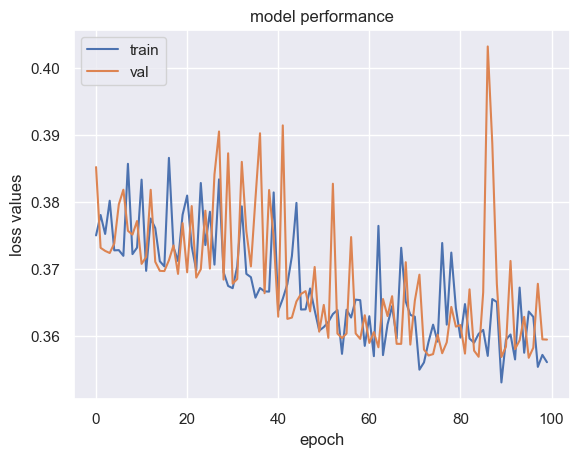

In [25]:
plt.plot(best_mlp_model.history_['loss'])
plt.plot(best_mlp_model.history_['val_loss'])
plt.title('model performance')
plt.ylabel('loss values')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

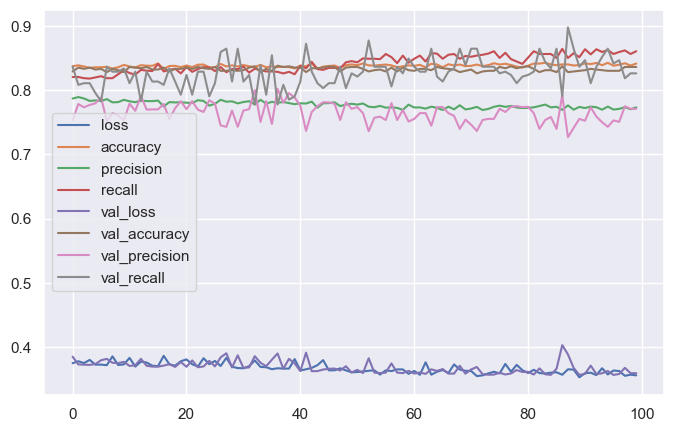

In [26]:
pd.DataFrame(best_mlp_model.history_).plot(figsize=(8,5))
plt.show()

In [27]:
prediction = best_mlp_model.predict(X_test)

25/25 [==============================] - 0s 1ms/step


In [28]:
from sklearn import metrics

In [29]:
accuracy = metrics.accuracy_score(y_test, prediction)
precision = metrics.precision_score(y_test, prediction)
recall = metrics.recall_score(y_test, prediction)

print('Accuracy: ', accuracy)
print('Precision: ', precision)
print('Recall: ', recall)

Accuracy:  0.836
Precision:  0.7708830548926014
Recall:  0.8260869565217391


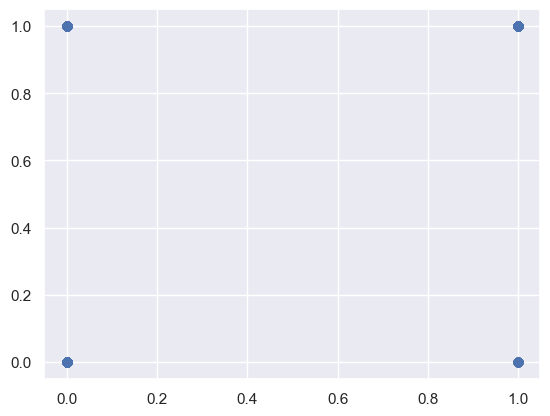

In [30]:
plt.scatter(y_test,prediction)

In [31]:
def real_predicted_viz(limit):
    plt.figure(figsize=(14,6))
    plt.plot(y_test[:limit],color='green',label='Actual')
    plt.plot(prediction[:limit],color='red',label='Predicted')
    plt.grid(alpha=0.3)
    
    plt.title('Real x Predicted')
    plt.legend()
    plt.show()

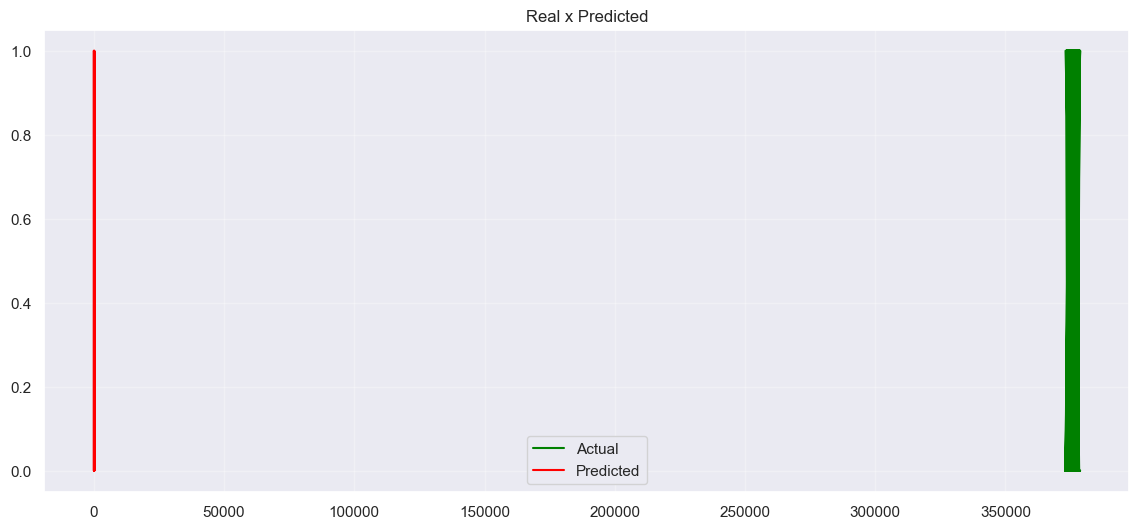

In [32]:
real_predicted_viz(200)